In [1]:
import pandas as pd
import os

import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle

with open('sbert_topic.pickle', 'rb') as file:
    save_dict = pickle.load(file)


ecb_with_topics = pd.DataFrame(
{"date": save_dict["date"],
    "dist": save_dict["dist"],
})
ecb_with_topics.head()


,date,dist
0,2021-05-27,"[[0.21629815, 0.024413059, 0.052392557, 0.0730..."
1,2021-05-27,"[[0.018513896, 0.013093044, 0.008514501, 0.029..."
2,2021-05-19,"[[0.16781583, 0.012153944, 0.17001057, 0.01567..."
3,2021-05-06,"[[0.0105395485, 0.011020768, 0.014013605, 0.01..."
4,2021-04-29,"[[0.2879435, 0.002589192, 0.0058928146, 0.0012..."


In [3]:

from scipy.ndimage.filters import gaussian_filter1d

threshold_significance = 0
threshold_mean_significance = 0
threshold_significance_fss = 0

def combine_dist(dist):
    
    return dist.mean(axis=0)

import math

ecb_with_topics['filtered'] = ecb_with_topics.apply(lambda row: combine_dist(row['dist']),axis=1)

quarters = ["(1|2|3)","(4|5|6)", "(7|8|9)","(10|11|12)"]

col = ["year","banking","valuation","household","real estate","corporate","external","sovereign","technology", "climate", "energy", "health", "eu"] # "fss_mean", "fss_std", "pos_mean", "pos_std", "neg_mean","neg_std"])

quarterly_data = pd.DataFrame(columns = col) 

def rescale(dist):
    beta = np.mean(dist[math.ceil(0.25*len(dist)):math.floor(0.75*len(dist))])
    alpha = np.max(np.array([(20+1/(np.std(dist)/np.mean(dist))), 400]))
    return 1/(1+np.exp(-alpha*(dist-beta)))

for year in range(1997,2022):
    for index, quarter in enumerate(quarters):
        data = ecb_with_topics.loc[ecb_with_topics['date'].str.contains(str(year) + '-0?' + quarter + '-'), :]
        # assume sample mean (neglect difference in datapoints)
        topics =data['filtered'].mean()
        if type(topics) != float:
            topics =  rescale(topics)
            temp_data = pd.DataFrame([[year + index/4 , topics[0],topics[1],topics[2],topics[3],topics[4],topics[5],topics[6],topics[7],topics[8],topics[9],topics[10],topics[11]]],columns = col)
    
        quarterly_data = quarterly_data.append(temp_data, ignore_index = True)

quarterly_data.to_csv('./ecb_topic_quarterly_bert.csv')

quarterly_data.set_index("year")

quarterly_data.head()



TypeError: object of type 'float' has no len()

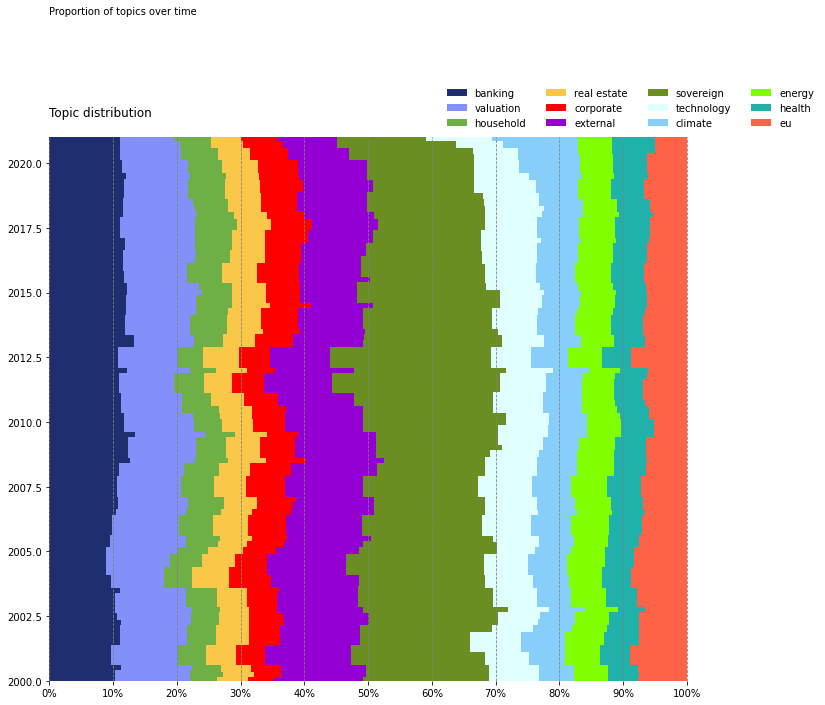

In [ ]:

# variables
labels = ["banking","valuation","household","real estate","corporate","external","sovereign","technology", "climate", "energy", "health", "eu"]

colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#FF0000','#9400D3','#6B8E23','#E0FFFF','#87CEFA','#7FFF00','#20B2AA','#FF6347']
title = 'Topic distribution\n'
subtitle = 'Proportion of topics over time'

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()[1:]
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.year, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(2000, 2021)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    
plt.show()
    
plot_stackedbar_p(quarterly_data, labels, colors, title, subtitle)